# Abril

---

In [57]:
import numpy as np
from datetime import date, timedelta
import string
import time
from pandas import DataFrame
from os import getcwd
from pygsheets import authorize
import pivottablejs

## Integração das APIs do GCP - das contas google 

### Conta RIO

In [2]:
credenciaisRio = authorize(service_file=getcwd()+'/keyapirio.json')

#### na célula abaixo os Links estarão ocultos

In [8]:
linkAgendamentoRio = 'xxxxx'
abaAgendamentoRio = 'xxxx'

#### Código de integração da APIRest google sheets

In [3]:
# acessando planilha
#planilhaAgendamentoRio = credenciaisRio.open_by_key(linkAgendamentoRio)
#tabelaAgendamentoRio = planilhaAgendamentoRio.spreadsheet_ids(abaAgendamentoRio)

### Conta RIO2

### Conta Carioca

Nessa etapa estamos acessando a base de dados do google via API, que em outras palavras se remete a integração de sistemas externos

In [156]:
credenciaisCarioca = authorize(service_file=getcwd()+'/keysurveycarioca.json')

acessando a planilha

In [157]:
link = 'https://docs.google.com/spreadsheets/d/esse é a parte que informa a planilha/'

In [158]:
# acessando planilha
planilha = credenciaisCarioca.open_by_url(link)
tabela = planilha.worksheet_by_title("Respostas ao formulário 1")

### Quadro de Dados (DataFrame)

Nessa etapa estamos transformando a base de atualizada até o momento da última integração realizada acima. Em um quadro de dados, para que assim possamos extrair a riqueza que a base tem a nos oferecer.

In [159]:
import datetime

Nessa parte estamos criando o objeto com todos os dados, que até a data informada

In [160]:
df_carioca_agend = DataFrame(tabela)
print(f'Na data {datetime.date.today().isoformat()} esse quadro de dados está sendo criado.')

Na data 2024-05-03 esse quadro de dados está sendo criado.


In [161]:
print(f'Até o momento informado na linha de cima, o agendamento foi aplicado {df_carioca_agend.shape[0] - 1} pessoas.')

Até o momento informado na linha de cima, o agendamento foi aplicado 1535 pessoas.


In [91]:
df_carioca_agend.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Carimbo de data/hora,LOCAL,NOME COMPLETO,,BAIRRO,CEP,DATA DE NASCIMENTO,TELEFONE,EMAIL,CPF,...,ENDEREÇO COMPLETO,CPF,Como soube do Projeto de Castração de cães e g...,,,,,,,


In [162]:
df_carioca_agend = df_carioca_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
df_carioca_agend.columns = list(df_carioca_agend[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].iloc[0])

Nessa etapa vamos informar os atributos ou variáveis que tem o quadro de dados, que em outras palavras são as perguntas (que se transformam em colunas na base de dados) respondidas no formulário __agendamento__ 

In [163]:
print (f'Segue a lista com todas variáveis da base de dados: {list(df_carioca_agend.columns)}')
print (f'''\nVamos utilizar as variáveis: {list(df_carioca_agend.columns)[0]}, {list(df_carioca_agend.columns)[11]}, 
{list(df_carioca_agend.columns)[12]} e {list(df_carioca_agend.columns)[13]}.''')

Segue a lista com todas variáveis da base de dados: ['Carimbo de data/hora', 'LOCAL', 'NOME COMPLETO', '', 'BAIRRO', 'CEP', 'DATA DE NASCIMENTO', 'TELEFONE', 'EMAIL', 'CPF', 'NOME DO ANIMAL', 'ESPÉCIE', 'GÊNERO', 'STATUS/ATENDIMENTO', 'MOTIVO', 'ENDEREÇO COMPLETO', 'CPF', 'Como soube do Projeto de Castração de cães e gatos?']

Vamos utilizar as variáveis: Carimbo de data/hora, ESPÉCIE, 
GÊNERO e STATUS/ATENDIMENTO.


In [164]:
df_carioca_agend = df_carioca_agend.drop(0, axis=0)

In [165]:
df_carioca_agend.head(1)

,Carimbo de data/hora,LOCAL,NOME COMPLETO,,BAIRRO,CEP,DATA DE NASCIMENTO,TELEFONE,EMAIL,CPF,NOME DO ANIMAL,ESPÉCIE,GÊNERO,STATUS/ATENDIMENTO,MOTIVO,ENDEREÇO COMPLETO,CPF,Como soube do Projeto de Castração de cães e gatos?
1,xx/0x/2024 xx:xx:xx,xxxxxxxxxxxxx,xxxxxxx,,xxxxxxxxxxxx,xxxxx-xxx,xx/0x/19xx,xxxxxxx,,xxxx,xxxxxxxxx,CANINO,FEMEA,,,,,


Essa é a etapa que iremos criar o sub quadro de dados (dataframe) com as variáveis importantes para o trabalho. Que nada mais é do que a segmentação.

In [166]:
relatorio_agendamento_carioca = DataFrame(DataFrame(df_carioca_agend['Carimbo de data/hora'].str.split(' ', expand=True)[0]).join(df_carioca_agend[['ESPÉCIE','GÊNERO','STATUS/ATENDIMENTO']]).groupby(by=['STATUS/ATENDIMENTO']).value_counts()).reset_index()

In [167]:
relatorio_agendamento_carioca.shape

(367, 5)

In [168]:
print (f'''Saímos de {df_carioca_agend.shape[0]} aplicações, 
para {relatorio_agendamento_carioca.shape[0]} aplicações.
Isso quer dizer que estamos trabalhando com {round(100*(relatorio_agendamento_carioca.shape[0]/df_carioca_agend.shape[0]),2)}% do total.''')

Saímos de 1535 aplicações, 
para 367 aplicações.
Isso quer dizer que estamos trabalhando com 23.91% do total.


Nessa etapa vamos verificar a governança de dados do nosso target, em outras palavras nossa variável alvo, na opção **CIRURGIA REALIZADA**

Podemos identificar no resultado abaixo a falta de governança, pois a opção de **CIRURGIA REALIZADA** possui até o momento 10 variações.

In [169]:
relatorio_agendamento_carioca['STATUS/ATENDIMENTO'].unique()

array(['CIRURGIA REALIZADA', 'RECUSA', 'CIRURGIA REALIZADA ',
       'CIRURGIA RECUSADA ', '', 'FALTA', 'CIRURGIA RECUSADA',
       'CIRURGIA RELIZADA', 'FALTO', 'DESISTÊNCIA ',
       'endereço não encontrado', 'CIRURGIA  REALIZADA ', 'Realizada ',
       'CIRURGIA REALIZADO', 'RECUSA ', ' CIRURGIA REALIZADA', 'FALTA ',
       'FATOU', 'CIRURGIA REALIAZADA ', 'CIEURGIA REALIZADA ',
       'CIRURGIA NÃO REALIZADA', 'CIRURGIA NÃO REALIZADA '], dtype=object)

In [170]:
relatorio_agendamento_carioca.tail(3)

,STATUS/ATENDIMENTO,0,ESPÉCIE,GÊNERO,count
364,CIRURGIA REALIZADA,31/03/2024,FELINO,MACHO,2
365,CIRURGIA REALIZADA,31/03/2024,CANINO,MACHO,2
366,CIRURGIA REALIZADA,31/03/2024,CANINO,FEMEA,1


In [171]:
relatorio_agendamento_carioca_realizado = relatorio_agendamento_carioca.loc[
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADA') | 
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADA ') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA RELIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA  REALIZADA ') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIZADO') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== ' CIRURGIA REALIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIRURGIA REALIAZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'CIEURGIA REALIZADA') |
(relatorio_agendamento_carioca['STATUS/ATENDIMENTO']== 'Realizada ')]

In [173]:
relatorio_agendamento_carioca_realizado.shape

(216, 5)

In [174]:
relatorio_agendamento_carioca_realizado['relativo'] = (relatorio_agendamento_carioca_realizado[['count']]/5)*100

/tmp/ipykernel_5225/2601593656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatorio_agendamento_carioca_realizado['relativo'] = (relatorio_agendamento_carioca_realizado[['count']]/5)*100


In [175]:
relatorio_agendamento_carioca_realizado

,STATUS/ATENDIMENTO,0,ESPÉCIE,GÊNERO,count,relativo
0,CIRURGIA REALIZADA,,FELINO,FEMEA,1,20.0
2,CIRURGIA REALIZADA,01/03/2024,CANINO,MACHO,1,20.0
3,CIRURGIA REALIZADA,01/03/2024,FELINO,FEMEA,1,20.0
4,CIRURGIA REALIZADA,01/04/2024,FELINO,MACHO,8,160.0
5,CIRURGIA REALIZADA,01/04/2024,CANINO,MACHO,7,140.0
...,...,...,...,...,...,...
362,CIRURGIA REALIZADA,30/04/2024,FELINO,MACHO,1,20.0
363,CIRURGIA REALIZADA,31/03/2024,FELINO,FEMEA,9,180.0
364,CIRURGIA REALIZADA,31/03/2024,FELINO,MACHO,2,40.0
365,CIRURGIA REALIZADA,31/03/2024,CANINO,MACHO,2,40.0


In [204]:
frequencia_relatorio1_indicador_utilizacao = DataFrame(relatorio_agendamento_carioca_realizado[['relativo']].value_counts()).reset_index()

In [205]:
frequencia_relatorio1_indicador_utilizacao['percentual']=round((frequencia_relatorio1_indicador_utilizacao[['count']]/frequencia_relatorio1_indicador_utilizacao['count'].sum())*100,2)

Qual o peso vamos encontrar.

- Considerando a meta de 5 castração por dia para cada um dos quatro subgrupos que são: cães, cadelas, gatos e gatas. Em forma sucinta, esperasse ao fim de cada dia de trabalho no trailer, ter castrado
    - 5 cães;
    - 5 cadelas;
    - 5 gatos;
    - 5 gatas; 

Os dados do dia 25 de fevereiro até o dia 02 de maio, temos o total de 216 castrações realizados, distribuidas por dia em 4 grupos.

- o cálculo do indicador de eficácia é:
    - $\frac{realizado}{esperado} * 100$

In [208]:
frequencia_relatorio1_indicador_utilizacao = frequencia_relatorio1_indicador_utilizacao.sort_values(by=['relativo'])

In [209]:
frequencia_relatorio1_indicador_utilizacao

,relativo,count,percentual
0,20.0,73,33.80
1,40.0,38,17.59
2,60.0,35,16.20
3,80.0,16,7.41
4,100.0,16,7.41
6,120.0,6,2.78
5,140.0,8,3.70
7,160.0,4,1.85
8,180.0,3,1.39
18,200.0,1,0.46


<Axes: ylabel='relativo'>

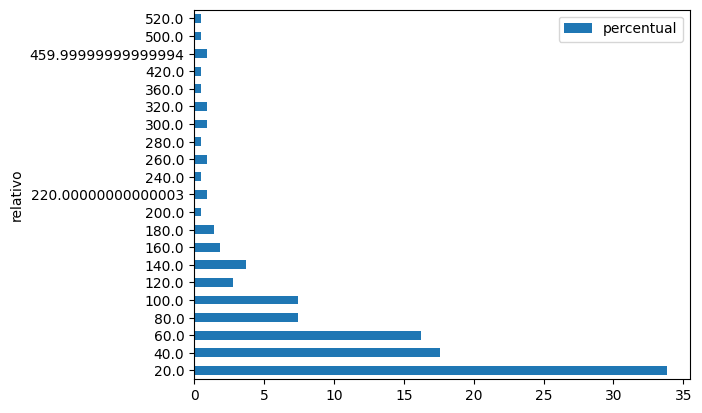

In [213]:
frequencia_relatorio1_indicador_utilizacao.plot.barh(x='relativo',y='percentual')

Criando o arquivo csv da análise

In [176]:
relatorio_agendamento_carioca_realizado.to_csv('relatorio1_bimestral_fev_mar_abr_agendamento_realizado.csv', index=False)

In [177]:
df_carioca_agend.to_csv('base_original_do_relatorio1_bimestral.csv', index=False)

In [56]:
import numpy as np
# natsort import index_natsorted
#DataFrame(teste).reset_index().sort_values(by=[0], key=lambda x=np.argsort(ind) )

---